<a href="https://colab.research.google.com/github/leandrorojasguerrero/atmos/blob/master/TitanicAn%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sólo mostrar errores del notebook 
import warnings  
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd    #lectura y tratamiento de datos
import numpy as np      #trabajar con valores numéricos
import seaborn as sns   #trabajar con gráficos
import matplotlib.pyplot as plt  #Gráficos
%matplotlib inline


In [ ]:
#Lectura del archivo csv
all_data = pd.read_csv('titanic_dataset.csv')
dataset = all_data.copy() #backup del dataset
dataset.head(10) #muestra las primeras 5 lineas del dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
dataset.tail() #Muestra las últimas 5 líneas del dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Muestra información detallada de nuestro dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Muestra información estadística de nuestro dataset
dataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset.sample() #Muestra un registro aleatório de nuestro dataset, podemos pasar un parámetro también.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2,B82 B84,C


In [ ]:
#Eliminando las columnas que no me servirán como features
dataset.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


In [ ]:
#Verificando si mi dataset fue ajustado eliminando las columnas mencionadas
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
#Creo una feature llamada Family, uniendo la columna SibSp(esposa ou conyugue) y Parch(PArientes)
dataset['Family'] = dataset['SibSp'] + dataset['Parch']
dataset.drop(['SibSp','Parch'],axis=1,inplace=True) #Elimino las columnas que ya no me sirven
dataset.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


In [ ]:
dataset.isnull().sum() #Verficvo los valores nulos de mi dataset


Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
Family        0
dtype: int64

In [ ]:
dataset.drop(['Cabin'],axis=1,inplace=True) #Elimino la columna Cabin


In [ ]:
#Asignamos NNN a los registros vacios de la columna Embarked
dataset['Embarked'].fillna('NNN', inplace=True)
#Ignoramos los registros NNN de la columna Embarked
dataset=dataset.loc[dataset['Embarked']!='NNN',:]


In [ ]:
#Intentando sdaber la edad de los faltantes
dataset['Title']=''

for i in dataset:
  dataset['Title'] = all_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
dataset.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [ ]:
#Damos un vistazo a los Titles
dataset['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

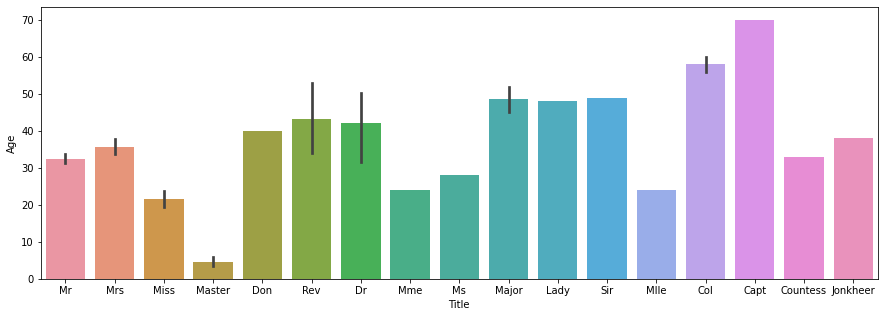

In [ ]:
#Grafico de Edad x Titulo
plt.figure(figsize=(15,5))
sns.barplot(x=dataset['Title'], y=dataset['Age'])


In [ ]:
#Creamos un diccionario de titulos con llave y las medias de edad como valor
age_means =dataset.groupby('Title')['Age'].mean().to_dict()
age_means


{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.662068965517243,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.654205607476634,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [ ]:
#Usando LOC encontramos las lineas que no tienen edad definifa e llenamos esas lineas con los valores medios
no_age = dataset.loc[np.isnan(dataset['Age'])].index
dataset.loc[no_age,'Age'] =dataset['Title'].loc[no_age].map(age_means)


In [ ]:
#ver registros nulos de mi dataset
dataset.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Title       0
dtype: int64

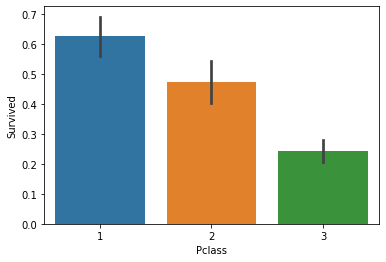

In [ ]:
#Clase x Sobreviviente
sns.barplot(x=dataset['Pclass'], y = dataset['Survived'])


In [ ]:
#LLamo de otros a los titulos que no tienen muchos registros
titles_dict = {
    
'Capt': 'Others',
'Major':'Others',
'Jonkheer': 'Others',
 'Don': 'Others',
'Sir': 'Others',
 'Dr': 'Others',
 'Rev': 'Others',
'Countess': 'Others',
 'Col': 'Others',
 
 'Lady': 'Others',
 
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Miss',

 'Mme': 'Mrs',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': "Miss"
}
dataset['Title'] = dataset['Title'].map(titles_dict)


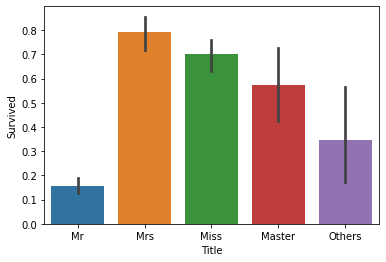

In [ ]:
#Graficar la relación existente entre titulos x sobrevivientes
sns.barplot(x=dataset['Title'], y = dataset['Survived'])


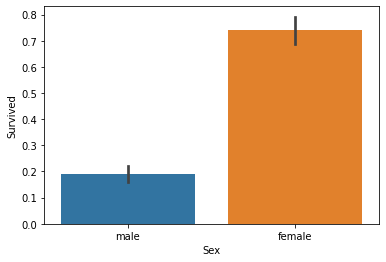

In [ ]:
#Sexo x Sobriviente
sns.barplot(x=dataset['Sex'], y = dataset['Survived'])


In [ ]:
# Por lo tanto, podemos transformar la edad en categorias ('Niño, Adulto y Anciano(VIejo)') de acuerdo con las edades.
# Asi no perdemos la generalización y reduzimos posíbles errores en el llenado de los valores ausentes.

#dataset['Age'] = pd.cut(dataset['Age'], bins=[0, 14, 50, 150], labels=['N', 'A', 'V'])
dataset.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
0,0,3,male,A,7.2500,S,1,Mr
1,1,1,female,A,71.2833,C,1,Mrs
2,1,3,female,A,7.9250,S,0,Miss
3,1,1,female,A,53.1000,S,1,Mrs
4,0,3,male,A,8.0500,S,0,Mr
5,0,3,male,A,8.4583,Q,0,Mr
6,0,1,male,V,51.8625,S,0,Mr
7,0,3,male,N,21.0750,S,4,Master
8,1,3,female,A,11.1333,S,2,Mrs
9,1,2,female,N,30.0708,C,1,Mrs


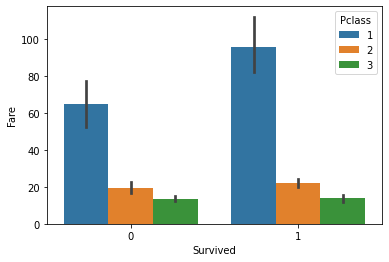

In [ ]:
#Graficar la relación entre Clase, Precio y Sobrevivió o no
sns.barplot(dataset['Survived'], dataset['Fare'], dataset['Pclass'])


In [ ]:
# Como la tasa es una variable numérica con una distribución sesgada por los valores ceros, usamos la transformación
# de BOX COX para buscar aproximarla a una distribución normal. Ese procedimiento entrega datos normalizados
# a los modelos lineales, que tienden a responder mejor con la entrada asi.



from scipy.stats import boxcox #importando libreria estadistica
dataset['Fare'] = boxcox(dataset['Fare'] + 1)[0]


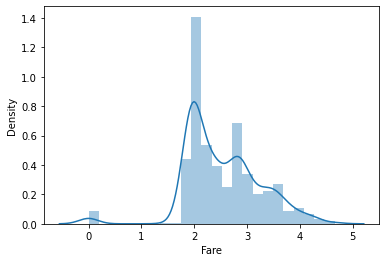

In [ ]:
# El gráfico muestra una nueva distribución de la columna 'Fare'.
sns.distplot(dataset['Fare'])


In [ ]:
# Ahora que las features fueron seleccionadas, podemos empezar a trabajar en el modelo.
# El primer paso es separar X (los vectores de entrada) de y (los valores de salída)

X = dataset.loc[: , dataset.columns != 'Survived']
y = dataset['Survived']


In [ ]:
# Para que las variábles categóricas sean aplicables a los modelos matemáticos, vamos a crear 'dummy variables'.
# Una categoria con 'n' possíbles valores se torna un conjunto de 'n-1' variábles binárias, indicando
# la pertenencia de el item a àquella categoria o no. poner en binario

X = pd.get_dummies(X)
X.shape


(889, 16)

In [ ]:
# El MinMaxScaler transformará los valores de entrada, haciendo que todos varien dentro del mismo intervalo
# El intervalo no fue especificado, entonces será aplicado el valor padron - de 0 a 1. Una conversión es proporcional.

from sklearn.preprocessing import MinMaxScaler #importando libreria de transformación
X = MinMaxScaler().fit_transform(X)


In [ ]:
# Vamos a generar polinômios de grado 2 a partir de los datos de entrada, para pasar al modelo combinaciones de esos datos.
# Esas combinaciones pueden eventualmente evidenciar relaciones entre las features que tienen impacto en la salída.
# Para cada par de features (x, y), teremos como saída (x, y, x^2, x*y, y^2)

from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2)
polynomial.fit(X)
X = polynomial.transform(X)


In [ ]:
X.shape

(889, 153)

In [ ]:
# Vamos a importar los clasificadores que seran usados.
# Para ese ejercício, vamos a comparar dos modelos. Uno de ellos es el Perceptron simple (recta de separación), 
# el otro es una regresión logística (sigmóide con una probabilidad de una clase).
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression


In [ ]:
# Usamos ahora una regresión logística para seleccionar cuál es el  mayor conjunto de features necesário para
# el modelo. Como ese es un problema de classificación, seleccionaremos las features que tienen el mejor score chi-quadrado.
# (que es un índice de correspondencia de variânza en la expectativa y en la distribución de los datos). 
#Un score mayor significa mayor chance de nuevos datos sigan la misma distribución, llevando a un E_out menor.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

lr_test = LogisticRegression()
best_score = 0
ideal_n = 0
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

lr_test = LogisticRegression()
best_score = 0
ideal_n = 0

# Entre 1 y 190 features, ordenadas de la 'mejor' para la 'peor' (según el chi-quadrado), 
# Cuál es el número de features que dá el mejor resultado de validación? Con cual score?
for i in range(1, 154):
    k_best = SelectKBest(score_func=chi2, k=i)
    k_best.fit(X, y)
    
    test_X = k_best.transform(X)
    lr_test.fit(test_X, y)
    score = lr_test.score(test_X, y)
    print(f'Score: {score} para {i} features')
    
    if score > best_score:
        best_score = score
        ideal_n = i
        
print(f'Mejor resultado: {best_score} para {ideal_n} features')


Score: 0.7862767154105736 para 1 features
Score: 0.7862767154105736 para 2 features
Score: 0.7862767154105736 para 3 features
Score: 0.7862767154105736 para 4 features
Score: 0.7862767154105736 para 5 features
Score: 0.7862767154105736 para 6 features
Score: 0.7862767154105736 para 7 features
Score: 0.7862767154105736 para 8 features
Score: 0.7874015748031497 para 9 features
Score: 0.7829021372328459 para 10 features
Score: 0.7952755905511811 para 11 features
Score: 0.7952755905511811 para 12 features
Score: 0.7952755905511811 para 13 features
Score: 0.7952755905511811 para 14 features
Score: 0.7952755905511811 para 15 features
Score: 0.7952755905511811 para 16 features
Score: 0.7952755905511811 para 17 features
Score: 0.7952755905511811 para 18 features
Score: 0.7952755905511811 para 19 features
Score: 0.7952755905511811 para 20 features
Score: 0.7952755905511811 para 21 features
Score: 0.7952755905511811 para 22 features
Score: 0.7952755905511811 para 23 features
Score: 0.79527559055

In [ ]:
# Podemos ver que muchas features (probablemente de las creadas con los polinômios) son irrelevantes para el modelo!
# Seleccionaremos solamente las mejores features en X

k_best = SelectKBest(score_func=chi2, k=ideal_n)
k_best.fit(X, y)
X = k_best.transform(X)


In [ ]:
# Creamos las instâncias para cada clasificador

perceptron = Perceptron()
logistic_regression = LogisticRegression()


In [ ]:
# el método fit() es usado para entrenar los modelos con los valores de entrenamiento

perceptron.fit(X, y)
logistic_regression.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# los scores nos muestran como los modelos se salíeron en la validación de los datos.
# A partir de los scores de entrenamiento, podemos calcular o E_in y crear expectativas sobre E_out.

print(f'O score do Perceptron é {perceptron.score(X, y)}')
print(f'O score do LogReg é {logistic_regression.score(X, y)}')


O score do Perceptron é 0.6816647919010124
O score do LogReg é 0.8458942632170978


In [ ]:
# La función learning_curve retorna una matriz con los resultados del cálculo de la Curva de aprendizaje de un algoritmo. 
# Los parámetro necesários son:
# - Un estimador para ser entrenado
# - Las entradas (X) de entrenamiento
# - Las salidas (y) de entrenamiento
# - El número - opcional - de puntos para validación del entrenamiento.

from sklearn.model_selection import learning_curve

# La función plot_learning_curve dibuja un gráfico con los datos de la matriz.
def plot_learning_curve(estimator, X, y):
    
    # El gráfico es inicializado con las características de la matriz.
    plt.figure()
    plt.title("Curva de Aprendizaje")
    plt.xlabel('Puntos do entrenamiento')
    plt.ylabel('Desempeno')
    plt.grid()
    
    # Calculamos los valores de la curva de aprendizaje, incrementando los datos de 10 en 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes)
    
    # Sacamos la media y el desvío padrón de cada secuencia de testes. 
    # Por padrón es realizada la validación cruzada en 3 conjuntos de datos.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    # El desempeño de entrenamiento queda en rojo y el de validación en verde
    plt.plot(points, mean_in, 'o-', color='red', label='Entrenamiento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    
    # Los desvios quedan alrededor de las lineas para indicar la variación en el aprendizaje
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

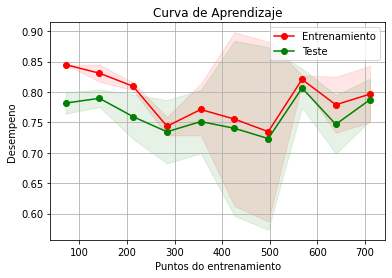

In [ ]:
#muestra la curva de aprendizaje 
plot_learning_curve(perceptron,X,y)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

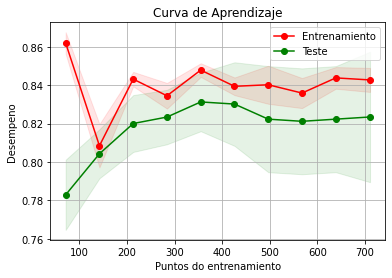

In [ ]:
plot_learning_curve(logistic_regression, X, y)
